In [87]:
from pathlib import Path
from scipy.stats import entropy
import pandas as pd
import seaborn as sns

This notebook calculates the entropy of each potential guess by looping over all potential 'targets' (the word you're trying to guess) from a word list and then calculates the distributions of outcomes ('guess_pmf').  The entropy of that distribution is the entropy of the guess. 

In [91]:
def result(guess, target): 
    res = [-1, -1, -1, -1, -1]
    for i, let in enumerate(guess):
        if let == target[i]:
            res[i] = 1
        elif let in target:
            res[i] = 0
        else:
            pass
    return tuple(res)
        

def guess_pmf(guess, word_list): 
    pmf = {}
    for target in word_list: 
        res = result(guess, target)
        try: 
            pmf[res] += 1
        except KeyError: 
            pmf[res] = 1
    return pmf
   
def guess_entropy(pmf): 
    return entropy(list(pmf.values()), base=2)




In [98]:
words = Path('word_list.txt').open('rt').readlines()
words = [x.strip() for x in words]
word_list = [x for x in words if len(x)==5]

data = {'guess': [], 'entropy': []}

for guess in word_list: 
    pmf = guess_pmf(guess, word_list)
    ent = guess_entropy(pmf)
    data['guess'].append(guess) 
    data['entropy'].append(ent)

df = pd.DataFrame(data)
df = df.sort_values(by='entropy', ascending=False)

In [99]:
df.iloc[[0, -1], :]

,guess,entropy
1534,raise,5.877910
1189,mamma,2.268546


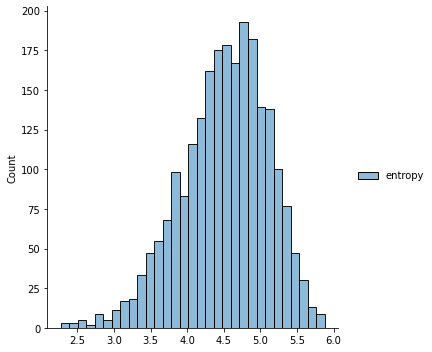

In [100]:
sns.displot(df, kind='hist')